In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf

def create_spectrogram(audio_file, image_file):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Create mel spectrogram using TensorFlow
    y_tensor = tf.convert_to_tensor(y, dtype=tf.float32)
    stft = tf.signal.stft(y_tensor, frame_length=1024, frame_step=512)
    
    mel_spectrogram = tf.signal.linear_to_mel_weight_matrix(
        num_mel_bins=128,
        num_spectrogram_bins=stft.shape[-1],
        sample_rate=sr,
        lower_edge_hertz=0,
        upper_edge_hertz=sr / 2,
    )
    mel_spectrogram = tf.matmul(tf.abs(stft), mel_spectrogram)

    # Convert mel spectrogram to decibels
    log_mel_spectrogram = tf.math.log(tf.maximum(mel_spectrogram, tf.keras.backend.epsilon()))

    # Plotting
    fig = plt.figure()
    librosa.display.specshow(log_mel_spectrogram.numpy(), sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    files = [f for f in os.listdir(input_path) if f.endswith('.wav')]
    total_files = len(files)

    for idx, file in enumerate(files):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

        # Print progress
        percent_complete = (idx + 1) / total_files * 100
        print(f'Converted {idx + 1}/{total_files} images ({percent_complete:.2f}%)')


In [2]:
# Cell 2
base_dir = 'C:/Users/kedar/Downloads/IRMAS-TrainingData'
instruments = [  'gac', 'gel', 'org', 'pia', 'vio']


In [3]:
create_pngs_from_wavs(os.path.join(base_dir, instruments[0]), f'Spectrograms/{instruments[0]}')

Converted 1/414 images (0.24%)
Converted 2/414 images (0.48%)
Converted 3/414 images (0.72%)
Converted 4/414 images (0.97%)
Converted 5/414 images (1.21%)
Converted 6/414 images (1.45%)
Converted 7/414 images (1.69%)
Converted 8/414 images (1.93%)
Converted 9/414 images (2.17%)
Converted 10/414 images (2.42%)
Converted 11/414 images (2.66%)
Converted 12/414 images (2.90%)
Converted 13/414 images (3.14%)
Converted 14/414 images (3.38%)
Converted 15/414 images (3.62%)
Converted 16/414 images (3.86%)
Converted 17/414 images (4.11%)
Converted 18/414 images (4.35%)
Converted 19/414 images (4.59%)
Converted 20/414 images (4.83%)
Converted 21/414 images (5.07%)
Converted 22/414 images (5.31%)
Converted 23/414 images (5.56%)
Converted 24/414 images (5.80%)
Converted 25/414 images (6.04%)
Converted 26/414 images (6.28%)
Converted 27/414 images (6.52%)
Converted 28/414 images (6.76%)
Converted 29/414 images (7.00%)
Converted 30/414 images (7.25%)
Converted 31/414 images (7.49%)
Converted 32/414 

In [4]:
# Cell 4: Generate Spectrograms for Remaining Instruments
for instrument in instruments[1:]:
    create_pngs_from_wavs(os.path.join(base_dir, instrument), f'Spectrograms/{instrument}')


Converted 1/535 images (0.19%)
Converted 2/535 images (0.37%)
Converted 3/535 images (0.56%)
Converted 4/535 images (0.75%)
Converted 5/535 images (0.93%)
Converted 6/535 images (1.12%)
Converted 7/535 images (1.31%)
Converted 8/535 images (1.50%)
Converted 9/535 images (1.68%)
Converted 10/535 images (1.87%)
Converted 11/535 images (2.06%)
Converted 12/535 images (2.24%)
Converted 13/535 images (2.43%)
Converted 14/535 images (2.62%)
Converted 15/535 images (2.80%)
Converted 16/535 images (2.99%)
Converted 17/535 images (3.18%)
Converted 18/535 images (3.36%)
Converted 19/535 images (3.55%)
Converted 20/535 images (3.74%)
Converted 21/535 images (3.93%)
Converted 22/535 images (4.11%)
Converted 23/535 images (4.30%)
Converted 24/535 images (4.49%)
Converted 25/535 images (4.67%)
Converted 26/535 images (4.86%)
Converted 27/535 images (5.05%)
Converted 28/535 images (5.23%)
Converted 29/535 images (5.42%)
Converted 30/535 images (5.61%)
Converted 31/535 images (5.79%)
Converted 32/535 

In [3]:
from tensorflow.keras.preprocessing import image

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(128, 128))  # Correct target size
        images.append(image.img_to_array(img))
        labels.append(label)
    
    return images, labels
from tensorflow.keras.preprocessing import image

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224))  # Correct target size
        images.append(image.img_to_array(img))
        labels.append(label)
    
    return images, labels


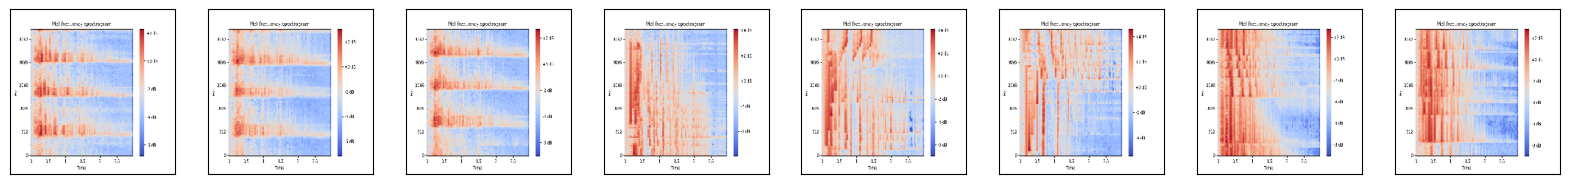

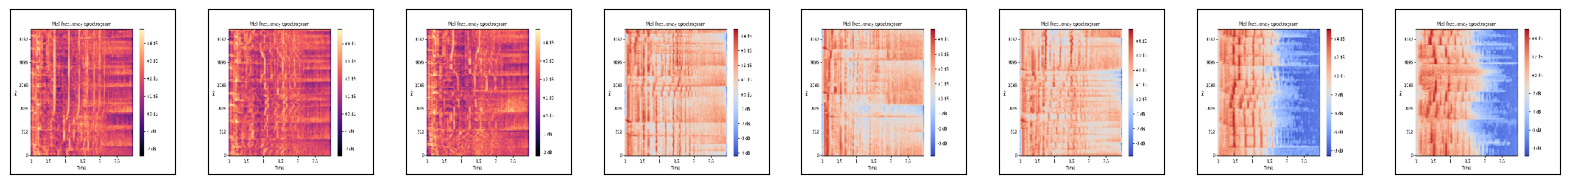

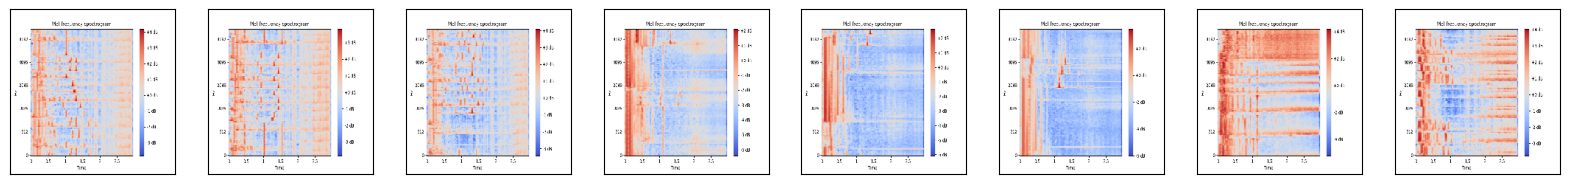

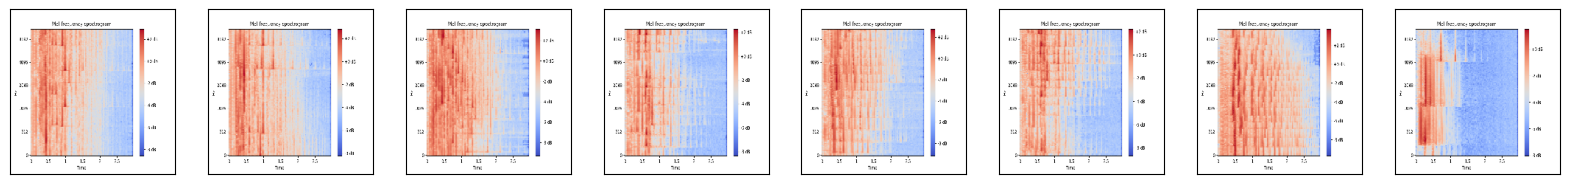

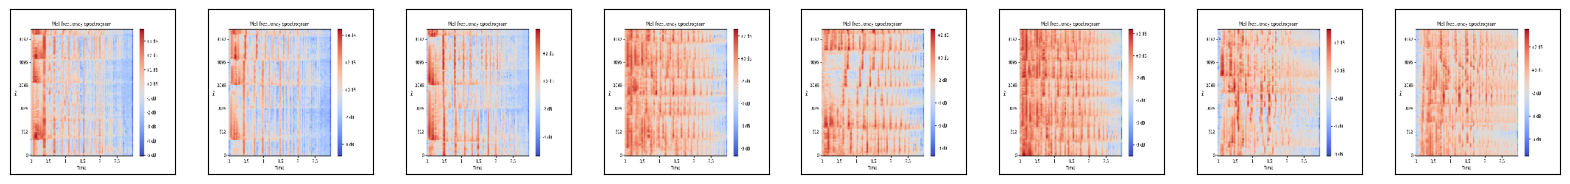

In [4]:
import matplotlib.pyplot as plt  # Ensure you have this import

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
    plt.show()  # Add this line to display the plot

x = []
y = []

for i, instrument in enumerate(instruments):
    images, labels = load_images_from_path(f'Spectrograms/{instrument}', i)
    show_images(images)
    x += images
    y += labels


In [6]:
import numpy as np  # Add this line

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


In [7]:
# Cell 8
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
# Modify in Cell 8 and Cell 12
model.add(Dense(len(instruments), activation='softmax', dtype='float32'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [8]:
# Cell 9
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=5, epochs=10)


Epoch 1/10
337/337 [==============================] - 94s 276ms/step - loss: 1.6288 - accuracy: 0.2185 - val_loss: 1.6053 - val_accuracy: 0.2227
Epoch 2/10
337/337 [==============================] - 90s 268ms/step - loss: 1.6064 - accuracy: 0.2173 - val_loss: 1.6051 - val_accuracy: 0.2227
Epoch 3/10
337/337 [==============================] - 88s 261ms/step - loss: 1.6066 - accuracy: 0.2138 - val_loss: 1.6054 - val_accuracy: 0.2227
Epoch 4/10
337/337 [==============================] - 87s 259ms/step - loss: 1.6062 - accuracy: 0.2132 - val_loss: 1.6054 - val_accuracy: 0.2227
Epoch 5/10
337/337 [==============================] - 87s 259ms/step - loss: 1.6063 - accuracy: 0.2221 - val_loss: 1.6054 - val_accuracy: 0.2227
Epoch 6/10
337/337 [==============================] - 88s 261ms/step - loss: 1.6064 - accuracy: 0.2072 - val_loss: 1.6051 - val_accuracy: 0.2227
Epoch 7/10
337/337 [==============================] - 90s 267ms/step - loss: 1.6061 - accuracy: 0.2221 - val_loss: 1.6051 - val_ac

[]

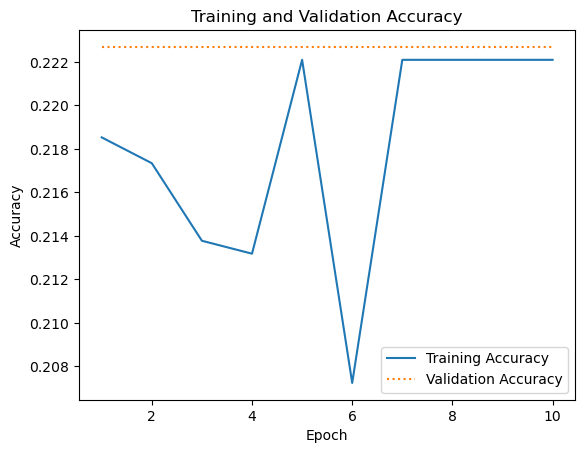

In [12]:
# Cell 10
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [10]:
# Cell 11
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)


23/23 [==============================] - 10s 387ms/step


In [13]:
# Cell 12
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
# Modify in Cell 8 and Cell 12
model.add(Dense(len(instruments), activation='softmax', dtype='float32'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Cell 13
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)


Epoch 1/10
169/169 [==============================] - 48s 278ms/step - loss: 11.4986 - accuracy: 0.5279 - val_loss: 1.9646 - val_accuracy: 0.5270
Epoch 2/10
169/169 [==============================] - 48s 285ms/step - loss: 0.8833 - accuracy: 0.7268 - val_loss: 1.1703 - val_accuracy: 0.6100
Epoch 3/10
169/169 [==============================] - 47s 277ms/step - loss: 0.6222 - accuracy: 0.7850 - val_loss: 1.5580 - val_accuracy: 0.5823
Epoch 4/10
169/169 [==============================] - 47s 276ms/step - loss: 0.3485 - accuracy: 0.8705 - val_loss: 1.1396 - val_accuracy: 0.7068
Epoch 5/10
169/169 [==============================] - 46s 274ms/step - loss: 0.1955 - accuracy: 0.9353 - val_loss: 1.2864 - val_accuracy: 0.6777
Epoch 6/10
169/169 [==============================] - 46s 275ms/step - loss: 0.1558 - accuracy: 0.9448 - val_loss: 1.1070 - val_accuracy: 0.6957
Epoch 7/10
169/169 [==============================] - 47s 280ms/step - loss: 0.1260 - accuracy: 0.9620 - val_loss: 1.3817 - val_a

[]

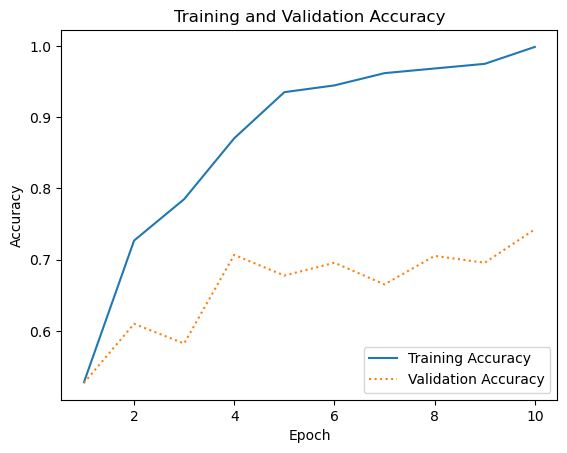

In [15]:
# Cell 14
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [16]:
# Cell 16: Save the trained model
model.save('C:/Users/kedar/Downloads/saved_model/my_instrument_classification_model.h5')

In [17]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('my_instrument_classification_model.h5')
 

23/23 [==============================] - 1s 46ms/step


Text(110.44999999999997, 0.5, 'Actual label')

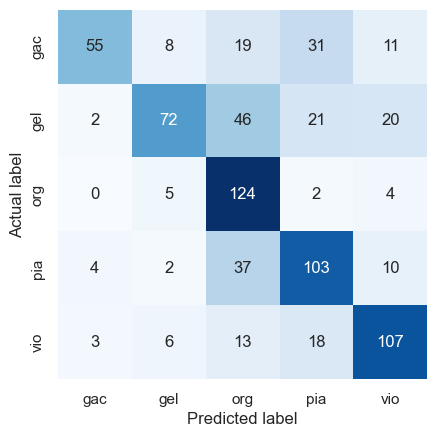

In [20]:
# Cell 15
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = loaded_model.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=instruments,
            yticklabels=instruments)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')